In [3]:
import nltk
nltk.download('reuters')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import reuters, stopwords
from nltk.probability import FreqDist
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import word_tokenize


import re
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
import os
import string
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim import models


[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [4]:
def reuters_stats():
    cats = reuters.categories()
    print("Reuters has %d categories/labels: \n%s" % (len(cats), cats))
    print(reuters.readme())
    print(len(reuters.raw()))
    print(len(reuters.words()))


In [5]:
reuters_stats()

Reuters has 90 categories/labels: 
['acq', 'alum', 'barley', 'bop', 'carcass', 'castor-oil', 'cocoa', 'coconut', 'coconut-oil', 'coffee', 'copper', 'copra-cake', 'corn', 'cotton', 'cotton-oil', 'cpi', 'cpu', 'crude', 'dfl', 'dlr', 'dmk', 'earn', 'fuel', 'gas', 'gnp', 'gold', 'grain', 'groundnut', 'groundnut-oil', 'heat', 'hog', 'housing', 'income', 'instal-debt', 'interest', 'ipi', 'iron-steel', 'jet', 'jobs', 'l-cattle', 'lead', 'lei', 'lin-oil', 'livestock', 'lumber', 'meal-feed', 'money-fx', 'money-supply', 'naphtha', 'nat-gas', 'nickel', 'nkr', 'nzdlr', 'oat', 'oilseed', 'orange', 'palladium', 'palm-oil', 'palmkernel', 'pet-chem', 'platinum', 'potato', 'propane', 'rand', 'rape-oil', 'rapeseed', 'reserves', 'retail', 'rice', 'rubber', 'rye', 'ship', 'silver', 'sorghum', 'soy-meal', 'soy-oil', 'soybean', 'strategic-metal', 'sugar', 'sun-meal', 'sun-oil', 'sunseed', 'tea', 'tin', 'trade', 'veg-oil', 'wheat', 'wpi', 'yen', 'zinc']

      The Reuters-21578 benchmark corpus, ApteMod vers

In [6]:
def frequency_dist():
    reuters_words = reuters.words()
    freq_dist_reuters = FreqDist(reuters_words)
    print(freq_dist_reuters.keys())
    freq_dist_reuters.plot(10)

dict_keys(['ASIAN', 'EXPORTERS', 'FEAR', 'DAMAGE', 'FROM', 'U', '.', 'S', '.-', 'JAPAN', 'RIFT', 'Mounting', 'trade', 'friction', 'between', 'the', 'And', 'Japan', 'has', 'raised', 'fears', 'among', 'many', 'of', 'Asia', "'", 's', 'exporting', 'nations', 'that', 'row', 'could', 'inflict', 'far', '-', 'reaching', 'economic', 'damage', ',', 'businessmen', 'and', 'officials', 'said', 'They', 'told', 'Reuter', 'correspondents', 'in', 'Asian', 'capitals', 'a', 'Move', 'against', 'might', 'boost', 'protectionist', 'sentiment', 'lead', 'to', 'curbs', 'on', 'American', 'imports', 'their', 'products', 'But', 'some', 'exporters', 'while', 'conflict', 'would', 'hurt', 'them', 'long', 'run', 'short', 'term', 'Tokyo', 'loss', 'be', 'gain', 'The', 'Has', 'it', 'will', 'impose', '300', 'mln', 'dlrs', 'tariffs', 'Japanese', 'electronics', 'goods', 'April', '17', 'retaliation', 'for', 'alleged', 'failure', 'stick', 'pact', 'not', 'sell', 'semiconductors', 'world', 'markets', 'at', 'below', 'cost', 'Uno

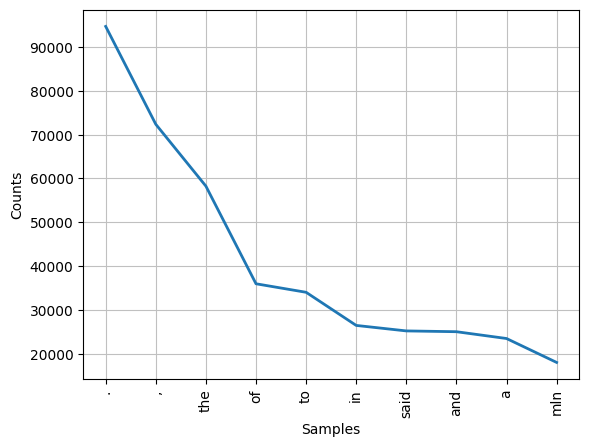

In [7]:
frequency_dist()

In [8]:
def documents_related_to_category(category_str, check_single_or_all_docs):
    if check_single_or_all_docs:
        category_docs = reuters.fileids(categories=[category_str])
        print("{} of documents in category={}".format(len(category_docs),category_str))    
        document_id_cat = category_docs[0]###Getting the first document related to that category
        print(document_id_cat)
        document_words_cat = reuters.words(document_id_cat)##Getting the words present in that document
        print(document_words_cat)
        print(reuters.paras(fileids=[document_id_cat]))
    else:
        for i in reuters.categories():
            print("{} documents are included in the topic \"{}\"".format(len(reuters.fileids(i)),i))



In [9]:
check_docs_related_to_one_category=True
documents_related_to_category('coffee',check_docs_related_to_one_category)
    
    

139 of documents in category=coffee
test/14840
['INDONESIAN', 'COMMODITY', 'EXCHANGE', 'MAY', ...]
[[['INDONESIAN', 'COMMODITY', 'EXCHANGE', 'MAY', 'EXPAND', 'The', 'Indonesian', 'Commodity', 'Exchange', 'is', 'likely', 'to', 'start', 'trading', 'in', 'at', 'least', 'one', 'new', 'commodity', ',', 'and', 'possibly', 'two', ',', 'during', 'calendar', '1987', ',', 'exchange', 'chairman', 'Paian', 'Nainggolan', 'said', '.'], ['He', 'told', 'Reuters', 'in', 'a', 'telephone', 'interview', 'that', 'trading', 'in', 'palm', 'oil', ',', 'sawn', 'timber', ',', 'pepper', 'or', 'tobacco', 'was', 'being', 'considered', '.'], ['Trading', 'in', 'either', 'crude', 'palm', 'oil', '(', 'CPO', ')', 'or', 'refined', 'palm', 'oil', 'may', 'also', 'be', 'introduced', '.'], ['But', 'he', 'said', 'the', 'question', 'was', 'still', 'being', 'considered', 'by', 'Trade', 'Minister', 'Rachmat', 'Saleh', 'and', 'no', 'decision', 'on', 'when', 'to', 'go', 'ahead', 'had', 'been', 'made', '.'], ['The', 'fledgling', '

In [10]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer


In [11]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()


In [12]:

def separate_train_test_docs():
    reuters_document_ids = reuters.fileids()###Returns the file id's of the documents
    test_documents = [doc for doc in reuters_document_ids if doc.startswith("test/")]
    train_documents = [doc for doc in reuters_document_ids if doc.startswith("training/")]
    print("Reuters corpus has %d train documents: \n"%len(train_documents))
    print("Reuters corpus has %d test documents: \n"%len(test_documents))
    documents_dict = {}
    ###Adding the raw data, i.e. news contents of the train and test documents
    documents_dict["train_docs"] = [reuters.raw(document_id) for document_id in train_documents]
    documents_dict["test_docs"] = [reuters.raw(document_id) for document_id in test_documents]
    return train_documents, test_documents, documents_dict
   

In [13]:
train_documents, test_documents, documents_dict = separate_train_test_docs()

Reuters corpus has 7769 train documents: 

Reuters corpus has 3019 test documents: 



In [14]:
def pre_processing(article):
    ###Initializing the stopwords corpus
    stop_words = stopwords.words('english')
    ###Initializing the stemmer
    stemmer = PorterStemmer()
    
    pre_processed_doc = []
    ###Gensim pre_process lowercases the words and then tokenizes the words
    for token in gensim.utils.simple_preprocess(article):
        if token not in stop_words and len(token)>3:
            stemmed_lematized_token = stemmer.stem(WordNetLemmatizer().lemmatize(token,pos='v'))
            pre_processed_doc.append(stemmed_lematized_token)
    
    ###To check the pre_processed result set this condition to True
    check_preprocess_result=False
    if check_preprocess_result:
        words = []
        for word in article:
            words.append(word)
        print(words)
        print('\n\n tokenized and lemmatized document: ')
        print(pre_processed_doc)
    return pre_processed_doc

In [15]:
preprocessed_documents = []

In [16]:

for i in range(len(documents_dict["train_docs"])):
    preprocessed_documents.append(pre_processing(documents_dict["train_docs"][i]))
for i in range(len(documents_dict["test_docs"])):
    preprocessed_documents.append(pre_processing(documents_dict["test_docs"][i]))

In [17]:
dictionary = gensim.corpora.Dictionary(preprocessed_documents)


In [18]:
counter =0
for key,value in dictionary.iteritems():
    print(key,value)
    counter+=1
    if counter>=10:
        break

0 allevi
1 almost
2 also
3 although
4 april
5 area
6 argentina
7 around
8 arriv
9 arroba


In [19]:
dictionary.filter_extremes(no_below=20,no_above=0.5,keep_n=100000)

In [20]:
bag_of_words_corpus = [dictionary.doc2bow(document) for document in preprocessed_documents]
print("Length of bag of words corpus:{} must equal the total number of documents".format(len(bag_of_words_corpus)))
print("The first pre processed document")
print(preprocessed_documents[0])
print("Bag of words for the first document")
print(bag_of_words_corpus[0])
print("Length of bag of words for first document = {}".format(len(bag_of_words_corpus[0])))
print("Length of bag of words for second document = {}".format(len(bag_of_words_corpus[1])))
    

Length of bag of words corpus:10788 must equal the total number of documents
The first pre processed document
['bahia', 'cocoa', 'review', 'shower', 'continu', 'throughout', 'week', 'bahia', 'cocoa', 'zone', 'allevi', 'drought', 'sinc', 'earli', 'januari', 'improv', 'prospect', 'come', 'temporao', 'although', 'normal', 'humid', 'level', 'restor', 'comissaria', 'smith', 'say', 'weekli', 'review', 'period', 'mean', 'temporao', 'late', 'year', 'arriv', 'week', 'end', 'februari', 'bag', 'kilo', 'make', 'cumul', 'total', 'season', 'stage', 'last', 'year', 'seem', 'cocoa', 'deliv', 'earlier', 'consign', 'includ', 'arriv', 'figur', 'comissaria', 'smith', 'say', 'still', 'doubt', 'much', 'crop', 'cocoa', 'still', 'avail', 'harvest', 'practic', 'come', 'total', 'bahia', 'crop', 'estim', 'around', 'bag', 'sale', 'stand', 'almost', 'hundr', 'thousand', 'bag', 'still', 'hand', 'farmer', 'middlemen', 'export', 'processor', 'doubt', 'much', 'cocoa', 'would', 'export', 'shipper', 'experi', 'dificulti

In [21]:
bow_first_doc = bag_of_words_corpus[0]
for i in range(len(bow_first_doc)):
    print("Word {} (\"{}\") appears {} time.".format(bow_first_doc[i][0],dictionary[bow_first_doc[i][0]],bow_first_doc[i][1]))
    

Word 0 ("almost") appears 1 time.
Word 1 ("also") appears 1 time.
Word 2 ("although") appears 1 time.
Word 3 ("april") appears 4 time.
Word 4 ("area") appears 2 time.
Word 5 ("argentina") appears 1 time.
Word 6 ("around") appears 1 time.
Word 7 ("arriv") appears 2 time.
Word 8 ("avail") appears 1 time.
Word 9 ("bag") appears 5 time.
Word 10 ("bean") appears 2 time.
Word 11 ("book") appears 1 time.
Word 12 ("brazilian") appears 1 time.
Word 13 ("buyer") appears 1 time.
Word 14 ("certif") appears 1 time.
Word 15 ("cocoa") appears 7 time.
Word 16 ("come") appears 2 time.
Word 17 ("commiss") appears 1 time.
Word 18 ("continu") appears 1 time.
Word 19 ("convert") appears 1 time.
Word 20 ("crop") appears 5 time.
Word 21 ("cumul") appears 1 time.
Word 22 ("currenc") appears 2 time.
Word 23 ("current") appears 1 time.
Word 24 ("deliv") appears 1 time.
Word 25 ("destin") appears 1 time.
Word 26 ("dlr") appears 14 time.
Word 27 ("doubt") appears 2 time.
Word 28 ("drought") appears 1 time.
Word 2

In [22]:
! pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.7/120.7 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 72.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 85.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 60.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   

In [23]:
from bertopic import BERTopic

In [24]:
bertopic_model = BERTopic(language='english', calculate_probabilities=True, verbose=True)


In [25]:

corpus_as_strings = []
for document in preprocessed_documents:
    document_string = " ".join(document)
    corpus_as_strings.append(document_string)

In [26]:
topics, probabilities = bertopic_model.fit_transform(corpus_as_strings)


Batches:   0%|          | 0/338 [00:00<?, ?it/s]

2023-04-30 00:03:12,933 - BERTopic - Transformed documents to Embeddings
2023-04-30 00:03:46,596 - BERTopic - Reduced dimensionality
2023-04-30 00:04:00,381 - BERTopic - Clustered reduced embeddings


In [27]:

bertopic_model.save('model')

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [28]:
bertopic_model.get_topic_info()

Topic  Count                                   Name
0       -1   3127               -1_say_compani_share_dlr
1        0    881                 0_loss_profit_rev_oper
2        1    336                     1_rev_mth_shr_nine
3        2    327                   2_oper_gain_rev_note
4        3    212           3_qtli_dividend_record_prior
..     ...    ...                                    ...
164    163     11  163_dollar_dealer_intervent_communiqu
165    164     11            164_rand_africa_south_sayam
166    165     10      165_output_index_januari_februari
167    166     10             166_bancorp_mth_brook_nine
168    167     10     167_keat_australia_forecast_budget

[169 rows x 3 columns]

In [29]:
bertopic_model.visualize_topics()

In [30]:
bertopic_model.visualize_barchart()

In [31]:
bertopic_model.visualize_heatmap()

In [32]:
print("The first pre-processed document")
print(preprocessed_documents[0])
    

The first pre-processed document
['bahia', 'cocoa', 'review', 'shower', 'continu', 'throughout', 'week', 'bahia', 'cocoa', 'zone', 'allevi', 'drought', 'sinc', 'earli', 'januari', 'improv', 'prospect', 'come', 'temporao', 'although', 'normal', 'humid', 'level', 'restor', 'comissaria', 'smith', 'say', 'weekli', 'review', 'period', 'mean', 'temporao', 'late', 'year', 'arriv', 'week', 'end', 'februari', 'bag', 'kilo', 'make', 'cumul', 'total', 'season', 'stage', 'last', 'year', 'seem', 'cocoa', 'deliv', 'earlier', 'consign', 'includ', 'arriv', 'figur', 'comissaria', 'smith', 'say', 'still', 'doubt', 'much', 'crop', 'cocoa', 'still', 'avail', 'harvest', 'practic', 'come', 'total', 'bahia', 'crop', 'estim', 'around', 'bag', 'sale', 'stand', 'almost', 'hundr', 'thousand', 'bag', 'still', 'hand', 'farmer', 'middlemen', 'export', 'processor', 'doubt', 'much', 'cocoa', 'would', 'export', 'shipper', 'experi', 'dificulti', 'obtain', 'bahia', 'superior', 'certif', 'view', 'lower', 'qualiti', 'rece

In [34]:
topics, probs = bertopic_model.transform([preprocessed_documents])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2023-04-30 00:09:34,439 - BERTopic - Reduced dimensionality
2023-04-30 00:09:34,462 - BERTopic - Calculated probabilities with HDBSCAN
2023-04-30 00:09:34,463 - BERTopic - Predicted clusters


# EVALUATE
**BERTOPIC LEARNING IS SUPERVISED LEARNING SO CANNOT BE EVALUATED ON METRICS SUCH AS F1SCORE, ACCURACY. PERFORMANCE EVALUATION HERE IS DONE BY CHECKING WHICH TOPIC A DOCUMENT BEONGS TO AND THE PROBABILITY**

In [39]:
topic_dist = bertopic_model.get_topics()

In [40]:
topics = []
for i in range(len(topic_dist)):
    topic_words = bertopic_model.get_topic(i)
    topics.append(topic_words)

In [42]:

print("Preprocessed document:\n", preprocessed_documents)
print("\nTopic probabilities:\n")
for topic, prob in zip(topics[0], probs[0]):
    print("Topic {}: {:.2f}%".format(topic, prob*100))
    print(bertopic_model.get_topic(topic))

Preprocessed document:
 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

